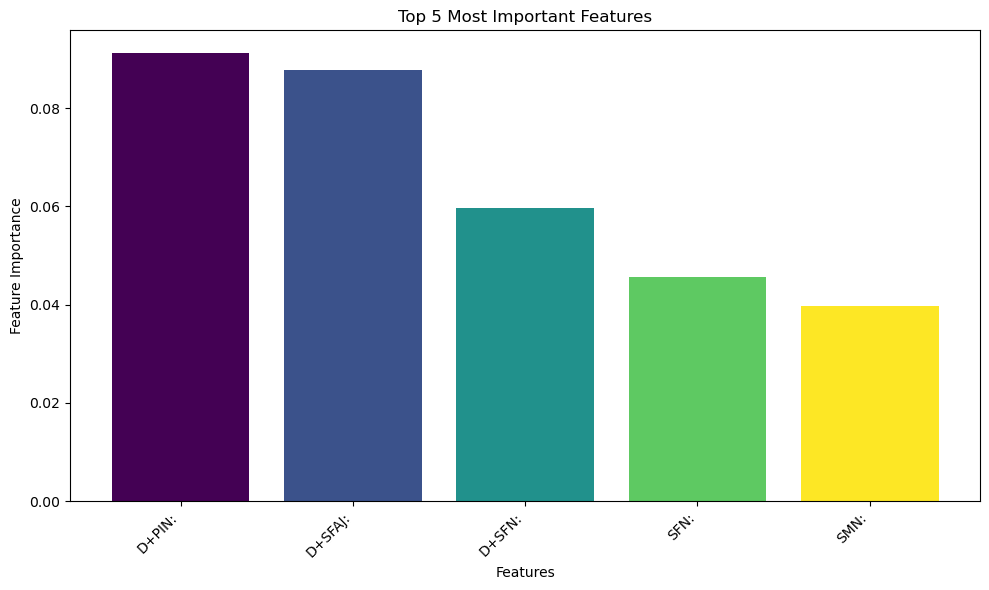

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load your dataset; replace 'your_data.csv' with your actual dataset file
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ConStudents\NewUpdate\ALL_SummaryV2\merged_file1.csv')

# Assuming you have a binary target variable named 'LABEL'
X = data.drop('LABEL', axis=1)
y = data['LABEL']

# Initialize a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
clf.fit(X, y)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top N most important features
num_features = 5  # Change this to the number of features you want to visualize
top_feature_indices = sorted_indices[:num_features]
top_feature_names = X.columns[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

# Create a vertical bar chart to visualize feature importances
colors = plt.cm.viridis(np.linspace(0, 1, num_features))
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top {} Most Important Features'.format(num_features))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:

# Load your dataset; replace 'your_data.csv' with your actual dataset file
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\ConStudents\NewUpdate\ALL_SummaryV2\merged_file1.csv')

# Assuming you have a binary target variable named 'target_column'
X = data.drop('LABEL', axis=1)
y = data['LABEL']
# Get feature importances from the model
feature_importances = clf.feature_importances_

# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top N most important features
num_features = 5  # Change this to the number of features you want to visualize
top_feature_indices = sorted_indices[:num_features]
top_feature_names = X.columns[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

# Get unique class values
class_values = np.unique(y)

# Create a grouped bar chart to compare feature importances for each class
colors = plt.cm.viridis(np.linspace(0, 1, num_features))
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
x = np.arange(len(class_values))

for i, feature in enumerate(top_feature_names):
    importance_by_class = []
    for c in class_values:
        importance = np.sum(top_feature_importances[i] * (y == c))
        importance_by_class.append(importance)
    bars = ax.bar(x + i * bar_width, importance_by_class, bar_width, label=feature, color=colors[i])
    
    # Add percentage labels to each bar
    total = sum(importance_by_class)
    for j, bar in enumerate(bars):
        percentage = (importance_by_class[j] / total) * 100
        ax.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=8, color='black')

ax.set_xlabel('Classes')
ax.set_ylabel('Feature Importance')
ax.set_title(f'Top {num_features} Most Important Features by Class')
ax.set_xticks(x + 0.2)
ax.set_xticklabels([f'Class {class_val}' for class_val in class_values])
ax.legend(title='Features', loc='upper left')
plt.tight_layout()

# Create a separate legend for the features
feature_legend = ax.legend(title='Features', loc='upper right', bbox_to_anchor=(1, 1))

# Add the feature legend to the plot
ax.add_artist(feature_legend)

plt.show()





